# **Praktikum 2 Computer Vision**

**Tugas no.1: Membuat program membalikkan gambar secara vertikal**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Import Library
**numpy**: Digunakan untuk manipulasi array numerik.

**matplotlib**: Library untuk visualisasi data, termasuk gambar.

**cv2**: Library pemrosesan citra untuk membaca dan memanipulasi gambar.

In [ ]:
grayImage = r'albert-einstein_gray.jpg'
colourImage = r'/content/tulips.jpg'

# Mendefinisikan Path Gambar
Disini kita mendefinisikan gambar yang akan kita gunakan.

In [ ]:
i_gray = cv2.imread(grayImage, cv2.IMREAD_GRAYSCALE)
i_rgb = cv2.imread(colourImage)

**cv2.imread(grayImage, cv2.IMREAD_GRAYSCALE)**: membaca 'albert-einstein_gray.jpg' sebagai gambar grayscale
**cv2.imread(colourImage)**: Membaca gambar 'tulips.jpg' sebagai gambar berwarna dalam format RGB

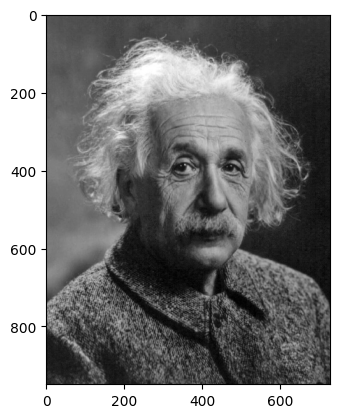

In [ ]:
plt.imshow(i_gray, cmap='gray')

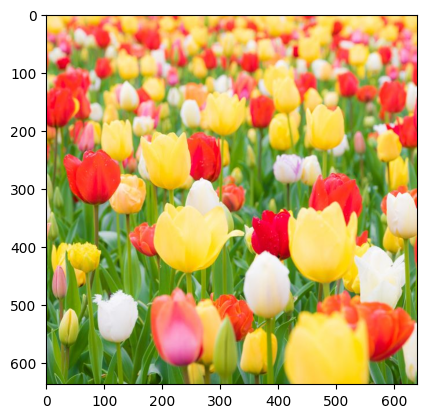

In [ ]:
plt.imshow(i_rgb[:,:,::-1])

plt.imshow(i_gray, cmap='gray'): Menampilkan gambar grayscale i_gray menggunakan colormap 'gray'.

plt.imshow(i_rgb[:,:,::-1]): Menampilkan gambar berwarna 'i_rgb'.

In [ ]:
numRows = i_gray.shape[0]
numCols = i_gray.shape[1]
print(numRows, numCols)

949 728


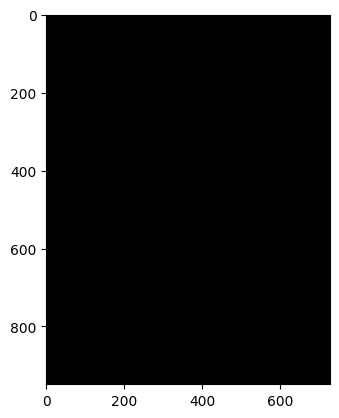

In [ ]:
i_gray2 = np.zeros((numRows, numCols), dtype='uint8')
plt.imshow(i_gray2, cmap='gray')

# Membuat dan menginisialisasi array kosong

membuat kanvas baru untuk menyalin atau memodifikasi gambar kosong.

In [ ]:
for i in range(numRows):
    for j in range(numCols):
        i_gray2[i,j] = i_gray[i,j]

# Menyalin data secara manual
Membuat salinan manual i_gray2 yang identik dengan i_gray, menunjukkan cara mengakses dan memodifikasi piksel secara eksplisit


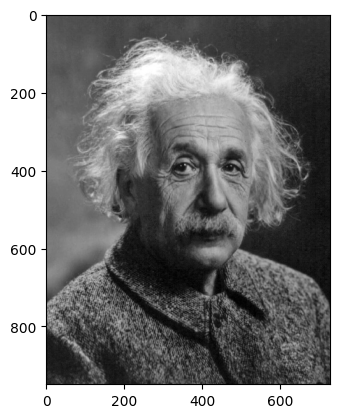

In [ ]:
plt.imshow(i_gray2, cmap='gray')

Menampilkan gambar yang telah disalin

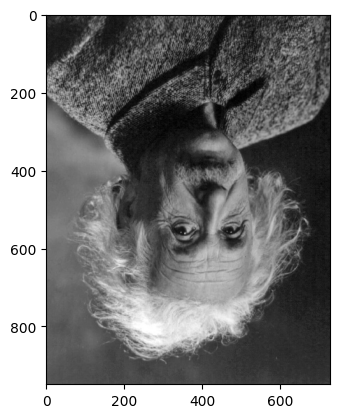

In [ ]:
for i in range(numRows):
    for j in range(numCols):
        i_gray2[numRows-i-1,j] = i_gray[i,j]
plt.imshow(i_gray2,cmap='gray')

# Flipping Vertikal
Melakukan transformasil flipping vertikal pada gambar grayscale

**Tugas No.2: Mengembangkan fungsi interpolasi bilinear yang dapat menerima faktor skala dinamis**

In [ ]:
import matplotlib as mpl

def displayImageInActualSize(I):
    dpi = mpl.rcParams['figure.dpi']  # Mendapatkan DPI dari konfigurasi matplotlib
    H, W = I.shape                    # Mendapatkan dimensi gambar (tinggi dan lebar)
    figSize = W / float(dpi), H / float(dpi)  # Menghitung ukuran gambar dalam figur berdasarkan DPI

    fig = plt.figure(figsize=figSize) # Membuat figur dengan ukuran sesuai
    ax = fig.add_axes([0, 0, 1, 1])   # Menambahkan sumbu yang mengisi seluruh figur
    ax.axis('off')                    # Mematikan sumbu (axes) agar tidak ditampilkan
    ax.imshow(I, cmap='gray')         # Menampilkan gambar dalam skala abu-abu
    plt.show()                        # Pastikan ini dijalankan untuk menampilkan gambar

displayImageInActualSize(I): Fungsi ini untuk menampilkan gambar grayscale
dalam ukuran asli piksel tanpa distorsi

In [ ]:
# Fungsi untuk membuat matriks scaling berdasarkan scale = [Sx, Sy]
# Sx: skala horizontal (x/width/col), Sy: skala vertikal (y/height/row)
# Matriks S didefinisikan sebagai [[Sy, 0], [0, Sx]] karena point vektor [y, x]
def get_scaling_matrix(scale):
    Sx, Sy = scale
    return np.array([[Sy, 0], [0, Sx]])

# Fungsi bilinear interpolation untuk grayscale (2D array)
# row, col: koordinat float asal
# img: gambar asli (i_gray, uint8)
def f_bilinearInterpolate(row, col, img):
    height, width = img.shape
    # Clamp jika di luar bound (gunakan nearest untuk edge)
    if row < 0 or row >= height - 1 or col < 0 or col >= width - 1:
        i_clamp = np.clip(int(np.round(row)), 0, height - 1)
        j_clamp = np.clip(int(np.round(col)), 0, width - 1)
        return img[i_clamp, j_clamp]

    i1 = int(row)  # floor
    j1 = int(col)
    alpha = row - i1  # fraksi vertikal
    beta = col - j1   # fraksi horizontal

    # Ambil nilai 4 tetangga (aman dari out-of-bound karena cek di atas)
    p11 = img[i1, j1]
    p12 = img[i1, j1 + 1]
    p21 = img[i1 + 1, j1]
    p22 = img[i1 + 1, j1 + 1]

    # Rumus bilinear
    g = (1 - alpha) * (1 - beta) * p11 + (1 - alpha) * beta * p12 + alpha * (1 - beta) * p21 + alpha * beta * p22
    return np.clip(int(np.round(g)), 0, 255)  # Kembalikan sebagai uint8 valid

# Fungsi utama untuk scaling
def f_scaleImage_gray(scale, i_gray):
    Sx, Sy = scale
    numRows, numCols = i_gray.shape  # old height (rows/y), width (cols/x)

    # Hitung ukuran baru
    new_height = int(numRows * Sy)  # new rows/y
    new_width = int(numCols * Sx)   # new cols/x

    # Buat gambar baru kosong
    I2 = np.zeros((new_height, new_width), dtype='uint8')

    # Dapatkan matriks scaling S dan inverse-nya
    S = get_scaling_matrix(scale)
    Tinv = np.linalg.inv(S)

    # Inverse mapping: loop over gambar baru
    for new_i in range(new_height):  # new_y
        for new_j in range(new_width):  # new_x
            P_dash = np.array([new_i, new_j])  # [new_y, new_x]
            P = Tinv.dot(P_dash)  # [old_y, old_x] sebagai float
            i, j = P[0], P[1]  # old row/y, col/x

            # Cek jika koordinat asal valid
            if 0 <= i < numRows and 0 <= j < numCols:
                g = f_bilinearInterpolate(i, j, i_gray)
                I2[new_i, new_j] = g
            # Else: tetap 0 (hitam)

    return I2

get_scaling_matrix(scale): Fungsi ini untuk membuat matriks scaling 2x2 berdasarkan vektor skala [Sx, Sy], dengan format [[Sy, 0], [0, Sx]] untuk transformasi koordinat [y, x].

f_bilinearInterpolate(row, col, img): Fungsi untuk menghitung nilai piksel grayscale dari koordinat float row, col pada gambar img menggunakan interpolasi bilinear.

f_scaleImage_gray(scale, i_gray): Fungsi utama untuk scaling gambar grayscale i_gray dengan faktor scale=[Sx, Sy], menggunakan inverse mapping, bilinear interpolation untuk nilai non-integer, dan array kosong untuk hasil baru.

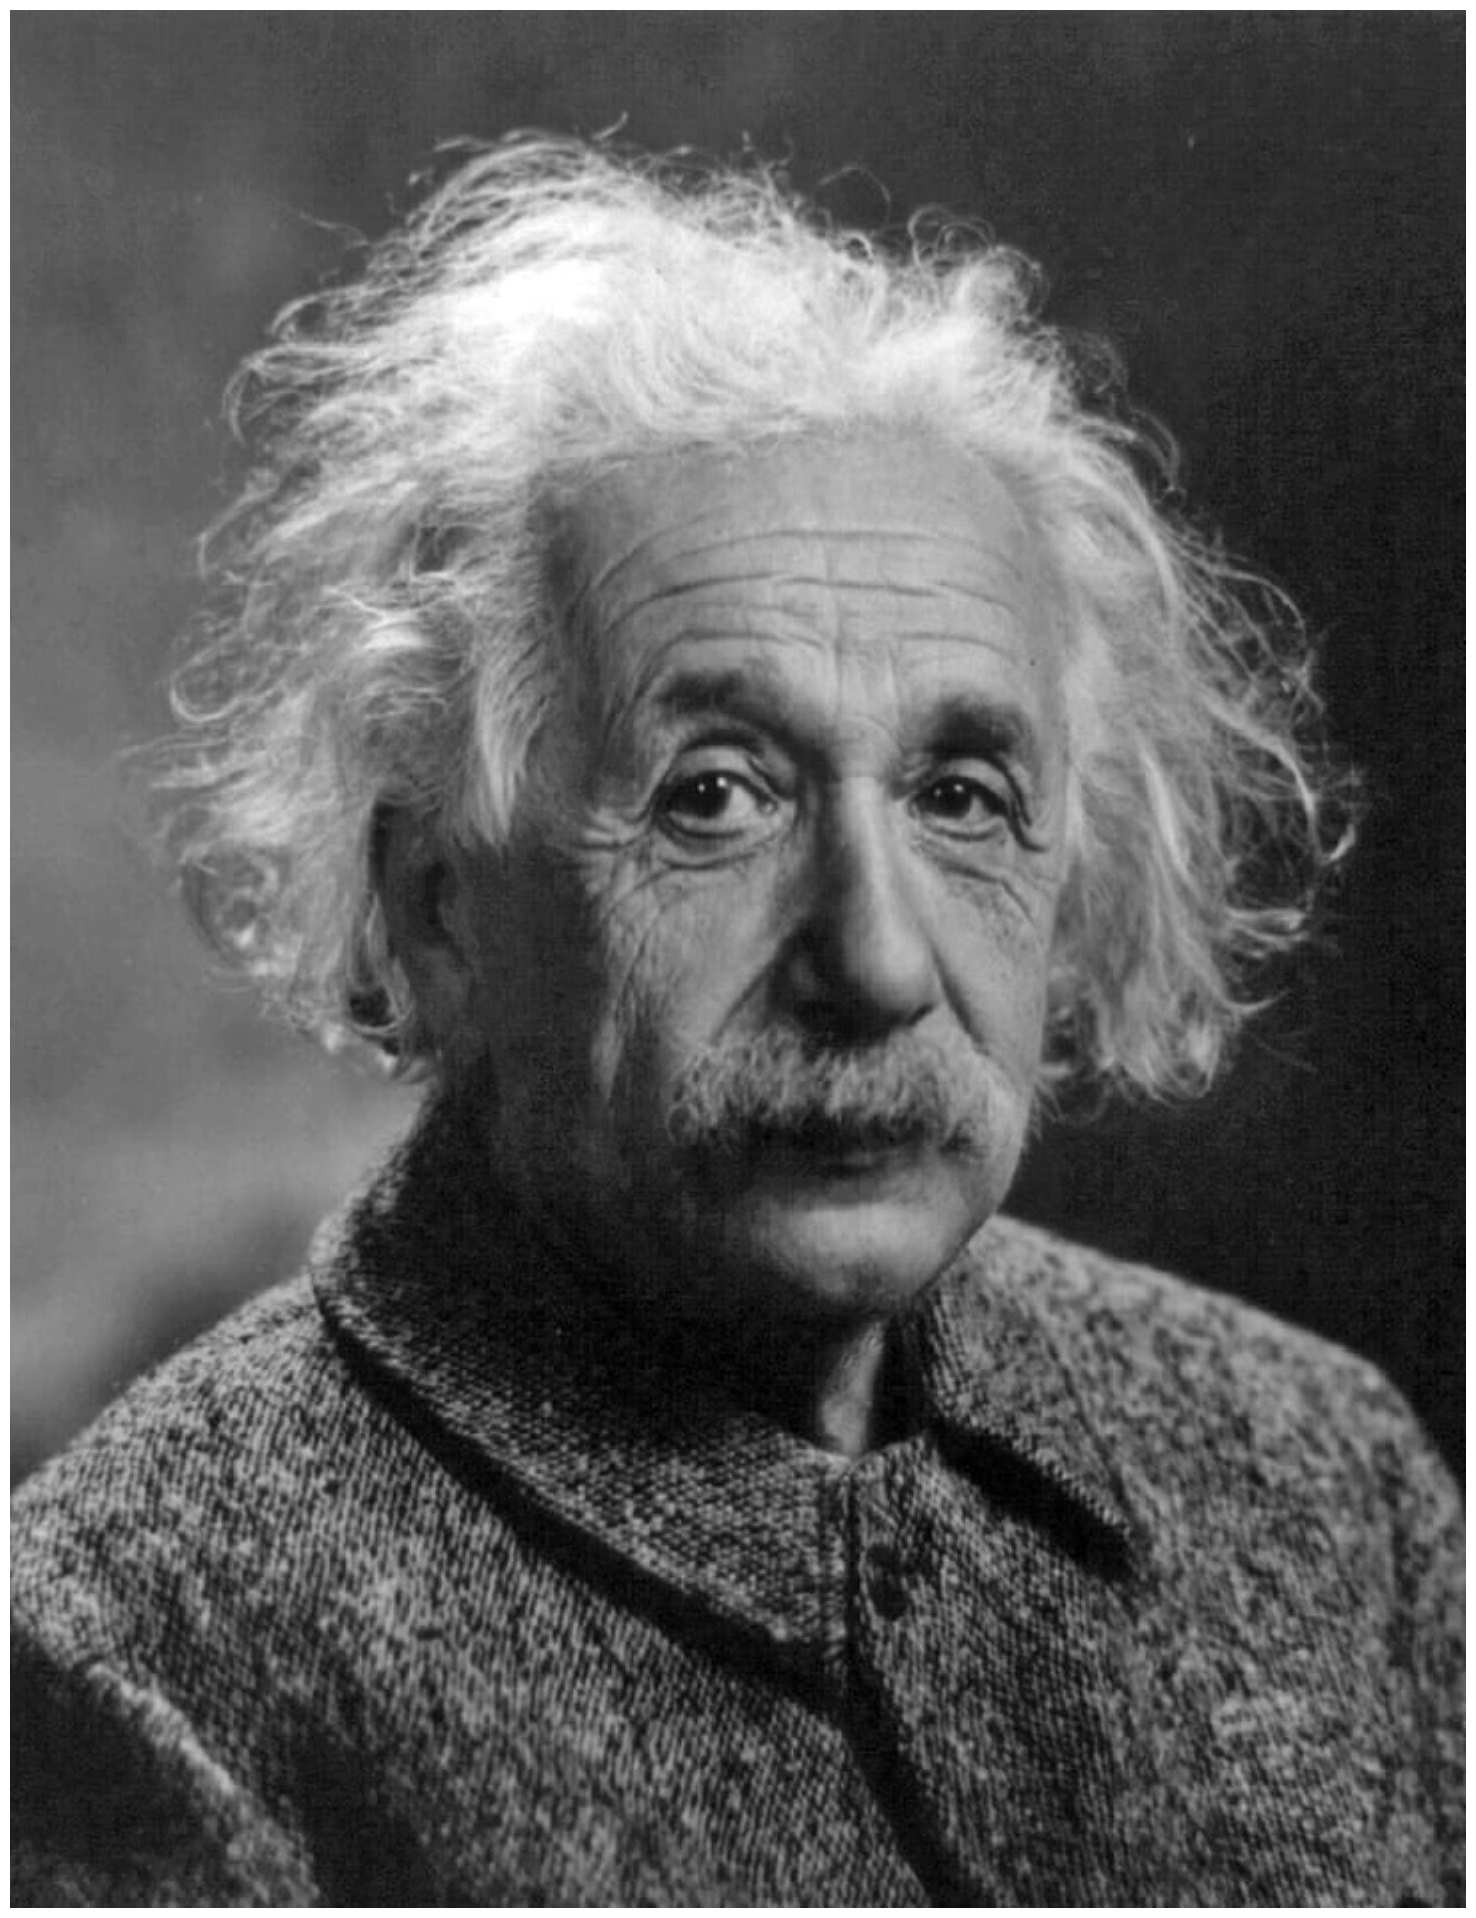

In [ ]:
displayImageInActualSize(f_scaleImage_gray([2,2],i_gray))

displayImageInActualSize(f_scaleImage_gray([2,2], i_gray)): Pemanggilan fungsi scaling dengan faktor 2x pada gambar i_gray, lalu menampilkan hasilnya dalam ukuran asli untuk verifikasi transformasi.

# **Soal 2 lanjutan**
Gambar berwarna (RGB)

In [ ]:
# Fungsi scaling untuk gambar RGB
def f_scaleImage(scale, img_rgb):
    """
    Melakukan transformasi skala pada gambar RGB menggunakan bilinear interpolation
    dan inverse mapping pada setiap saluran warna.

    Parameters:
    - scale: list atau tuple [Sx, Sy] untuk faktor skala horizontal dan vertikal.
    - img_rgb: gambar RGB (numpy array 3D: height x width x 3, dtype uint8).

    Returns:
    - img_scaled: gambar RGB yang telah di-scale.
    """
    if len(img_rgb.shape) != 3 or img_rgb.shape[2] != 3:
        raise ValueError("Input harus gambar RGB 3-channel (H x W x 3)")

    height, width, _ = img_rgb.shape
    Sx, Sy = scale

    # Hitung ukuran baru
    new_height = int(height * Sy)
    new_width = int(width * Sx)

    # Pisahkan channel RGB
    r_channel = img_rgb[:,:,0]  # Red
    g_channel = img_rgb[:,:,1]  # Green
    b_channel = img_rgb[:,:,2]  # Blue

    # Terapkan scaling pada setiap channel
    r_scaled = f_scaleImage_gray(scale, r_channel)
    g_scaled = f_scaleImage_gray(scale, g_channel)
    b_scaled = f_scaleImage_gray(scale, b_channel)

    # Gabungkan kembali channel
    img_scaled = np.stack([r_scaled, g_scaled, b_scaled], axis=2)

    return img_scaled

 f_scaleImage(scale, img_rgb):Melakukan transformasi skala pada gambar RGB menggunakan bilinear interpolation dan inverse mapping untuk setiap saluran warna (R, G, B).

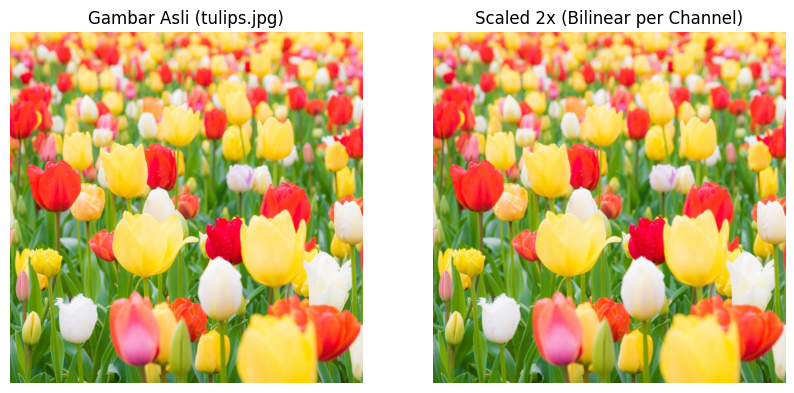

In [ ]:
# @title Test Scaling 2x
scaled_img_2x = f_scaleImage([2, 2], i_rgb[:,:,::-1])
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(i_rgb[:,:,::-1])
plt.title('Gambar Asli (tulips.jpg)')
plt.axis('off')
plt.subplot(122)
plt.imshow(scaled_img_2x)
plt.title('Scaled 2x (Bilinear per Channel)')
plt.axis('off')
plt.show()

Menguji fungsi f_scaleImage dengan skala [2, 2] untuk memperbesar gambar i_rgb

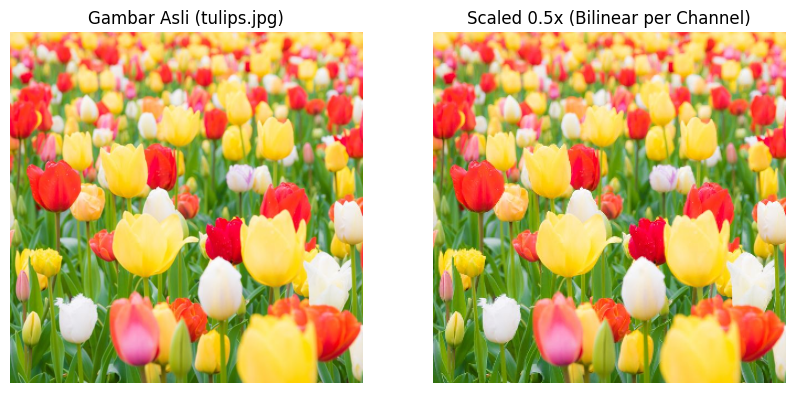

In [ ]:
# @title Test Scaling 0.5x
scaled_img_0_5x = f_scaleImage([0.5, 0.5], i_rgb[:,:,::-1])
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(i_rgb[:,:,::-1])
plt.title('Gambar Asli (tulips.jpg)')
plt.axis('off')
plt.subplot(122)
plt.imshow(scaled_img_0_5x)
plt.title('Scaled 0.5x (Bilinear per Channel)')
plt.axis('off')
plt.show()

Menguji fungsi f_scaleImage dengan skala [0.5, 0.5] untuk memperkecil gambar i_rgb.